In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from pathlib import Path

from scipy.stats import linregress
from scipy.stats import f_oneway

# set base directories
#BASE_DIR = Path(__file__).absolute().parent.parent

## Load in data

In [6]:
distance_df = pd.read_csv('distance.csv')
pellet_df = pd.read_csv('pellet.csv')
vwra_df = pd.read_csv('cogVWRA_distance 2.csv')
ymaze_df = pd.read_csv('correctEntries.csv')
#note -- some open field data missing (& none corrected)

In [7]:
distance_df.head()

,Day,Date,Time,201808 reversal1-25:Irrad,201808 reversal1-26:Sham,201808 reversal1-28:Irrad,201809 reversal-13:Sham,201809 reversal-14:Irrad,201809 reversal-15:Irrad,201809 reversal-16:Sham,...,201811 reversal1-18:Sham,201811 reversal1-20:Irrad,201811 reversal2-21:Irrad,201811 reversal2-22:Sham,201811 reversal2-23:Sham,201811 reversal2-24:Irrad,201812 reversal-1:Sham,201812 reversal-2:Irrad,201812 reversal-3:Sham,201812 reversal-4:Irrad
0,-5,5/27/50,17:12,NaN,NaN,NaN,203.462,165.051,0.0,160.431,...,112.264,0.0,0.0,183.325,101.892,233.284,131.395,208.479,141.803,231.773
1,-5,5/27/50,17:13,NaN,NaN,NaN,133.539,189.141,0.0,152.866,...,187.448,0.0,0.0,164.514,165.498,173.539,147.012,149.991,161.234,287.352
2,-5,5/27/50,17:14,NaN,NaN,NaN,13.632,202.818,0.0,10.340,...,95.392,0.0,0.0,130.638,45.457,182.345,121.037,216.182,128.220,222.124
3,-5,5/27/50,17:15,NaN,NaN,NaN,77.649,0.000,0.0,75.035,...,101.233,0.0,0.0,111.376,0.000,166.933,134.530,259.667,147.407,267.275
4,-5,5/27/50,17:16,NaN,NaN,NaN,219.045,0.000,0.0,18.502,...,0.000,0.0,0.0,72.598,0.000,250.807,214.366,135.046,158.703,178.139


In [8]:
pellet_df.head()

,Day,Date,Time,201808 reversal1-25:Irrad,201808 reversal1-26:Sham,201808 reversal1-28:Irrad,201809 reversal-13:Sham,201809 reversal-14:Irrad,201809 reversal-15:Irrad,201809 reversal-16:Sham,...,201811 reversal1-18:Sham,201811 reversal1-20:Irrad,201811 reversal2-21:Irrad,201811 reversal2-22:Sham,201811 reversal2-23:Sham,201811 reversal2-24:Irrad,201812 reversal-1:Sham,201812 reversal-2:Irrad,201812 reversal-3:Sham,201812 reversal-4:Irrad
0,-5,5/27/50,17:12,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-5,5/27/50,17:13,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-5,5/27/50,17:14,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-5,5/27/50,17:15,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-5,5/27/50,17:16,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
vwra_df.head()
# odd that rows with same timestamp -- probably tested at different times and simplified for coding
# is this VWRA or distance data?
# Fig 2B can have all data
# Make version with open field  

,Day,Date,Time,OpenFieldMice1-20:Irrad,OpenFieldMice1-21:Irrad,OpenFieldMice1-24:Irrad,OpenFieldMice1-29:Irrad,OpenFieldMice1-31:Irrad,OpenFieldMice1-33:Irrad,OpenFieldMice1-22:Sham,...,YMaze2-12:Irrad,YMaze2-16:Irrad,YMaze2-02:Sham,YMaze2-03:Sham,YMaze2-05:Sham,YMaze2-08:Sham,YMaze2-10:Sham,YMaze2-11:Sham,YMaze2-13:Sham,YMaze2-14:Sham
0,-8,5/24/50,13:22:00,3.112,2.264,0.452,0.688,1.12,2.148,2.996,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,-8,5/24/50,13:23:00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,-8,5/24/50,13:24:00,0.104,0.104,0.000,0.000,0.00,0.000,0.000,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
3,-8,5/24/50,13:25:00,0.520,0.232,0.000,0.000,0.00,0.000,0.000,...,0.0,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.0,0.0
4,-8,5/24/50,13:26:00,1.204,1.748,0.072,0.000,0.00,0.000,0.036,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
ymaze_df.head()
#1 (..04)- groups = [[1,3,5,6,8,9,13],[2,4,7,10,11,12,14]]
#2 (..05)- groups = [[1,4,7,9,12,16],[2,3,5,8,10,11,13,14]]

,Time,20170604-01,20170604-02,20170604-03,20170604-04,20170604-05,20170604-06,20170604-07,20170604-08,20170604-09,...,20170905-13,20170905-14,20170905-16,20170905-17,20170905-18,20170905-19,20170905-20,20170905-21,20170905-22,20170905-23
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
distance_df.shape

(19709, 24)

In [12]:
pellet_df.shape

(19709, 24)

In [13]:
#distance_filt.shape

## Distance 

In [14]:
#eliminate due to NA values
distance_filt = distance_df.drop(['201808 reversal1-25:Irrad', '201808 reversal1-26:Sham', 
                                 '201808 reversal1-28:Irrad'], axis=1)
distance_filt.head()

,Day,Date,Time,201809 reversal-13:Sham,201809 reversal-14:Irrad,201809 reversal-15:Irrad,201809 reversal-16:Sham,201810 reversal-17:Sham,201810 reversal-18:Irrad,201810 reversal-20:Sham,...,201811 reversal1-18:Sham,201811 reversal1-20:Irrad,201811 reversal2-21:Irrad,201811 reversal2-22:Sham,201811 reversal2-23:Sham,201811 reversal2-24:Irrad,201812 reversal-1:Sham,201812 reversal-2:Irrad,201812 reversal-3:Sham,201812 reversal-4:Irrad
0,-5,5/27/50,17:12,203.462,165.051,0.0,160.431,22.830,64.380,357.014,...,112.264,0.0,0.0,183.325,101.892,233.284,131.395,208.479,141.803,231.773
1,-5,5/27/50,17:13,133.539,189.141,0.0,152.866,77.129,122.548,225.947,...,187.448,0.0,0.0,164.514,165.498,173.539,147.012,149.991,161.234,287.352
2,-5,5/27/50,17:14,13.632,202.818,0.0,10.340,32.856,121.389,182.863,...,95.392,0.0,0.0,130.638,45.457,182.345,121.037,216.182,128.220,222.124
3,-5,5/27/50,17:15,77.649,0.000,0.0,75.035,79.196,116.402,194.682,...,101.233,0.0,0.0,111.376,0.000,166.933,134.530,259.667,147.407,267.275
4,-5,5/27/50,17:16,219.045,0.000,0.0,18.502,97.081,181.265,286.284,...,0.000,0.0,0.0,72.598,0.000,250.807,214.366,135.046,158.703,178.139


In [15]:
# distance_day contains the sum of distance consumed per day on the 6 days after irrad
# This matches the description of figure 2 used in the paper

distance_day = distance_filt.groupby('Day').agg(sum)
distance_day['Temp'] = np.arange(15)

distance_day = distance_day.add_prefix('dist_')
distance_day = distance_day.rename({'dist_Temp':'Temp'},axis=1)
distance_day

,dist_201809 reversal-13:Sham,dist_201809 reversal-14:Irrad,dist_201809 reversal-15:Irrad,dist_201809 reversal-16:Sham,dist_201810 reversal-17:Sham,dist_201810 reversal-18:Irrad,dist_201810 reversal-20:Sham,dist_201811 reversal1-17:Irrad,dist_201811 reversal1-18:Sham,dist_201811 reversal1-20:Irrad,dist_201811 reversal2-21:Irrad,dist_201811 reversal2-22:Sham,dist_201811 reversal2-23:Sham,dist_201811 reversal2-24:Irrad,dist_201812 reversal-1:Sham,dist_201812 reversal-2:Irrad,dist_201812 reversal-3:Sham,dist_201812 reversal-4:Irrad,Temp
Day,,,,,,,,,,,,,,,,,,,
-5,52294.800,71377.730,47377.851,49562.836,78124.041,47768.512,33158.714,65794.764,43586.181,48028.808,75667.133,76249.147,62663.512,101128.524,64704.708,41456.946,74503.024,97658.611,0
-4,42136.560,54165.125,39978.723,36172.973,42522.598,23611.912,21525.133,38192.833,25562.252,42153.002,46343.678,56731.093,63373.086,56848.053,43640.563,28078.686,42790.204,69630.508,1
-3,38555.946,57246.684,27726.028,36087.512,31807.025,19614.099,19282.446,26301.593,30634.481,43849.583,47010.380,36365.530,67444.510,54606.206,34142.258,27086.150,33607.904,50633.031,2
-2,44079.400,61406.858,25970.985,42269.677,46795.292,17536.902,25085.581,36990.166,29888.724,63103.721,48434.430,46982.019,49156.391,82487.966,35170.118,36018.996,47246.500,58638.723,3
-1,32473.808,46547.123,23524.307,28800.185,28366.281,11751.612,25361.173,27151.089,28503.555,41273.705,36912.560,31491.974,37994.382,58137.974,26299.449,27407.976,34909.564,43532.181,4
0,19902.748,22081.573,19567.238,17070.376,12892.950,7041.473,12675.013,12424.742,7685.075,14038.660,16693.870,14773.543,15134.329,17689.966,11792.814,20811.135,14085.373,10344.654,5
1,12928.702,22489.372,17319.799,13524.144,10106.943,6418.638,10098.272,16303.478,4819.336,8798.131,8853.349,6936.255,12297.957,6495.821,5737.338,6906.379,2032.046,2885.423,6
2,21372.168,20823.683,15353.379,18589.051,29874.931,11425.751,23900.644,19106.055,24034.453,7822.150,7063.836,32492.697,28178.690,4750.579,31476.683,10460.202,12697.675,6189.569,7
3,22746.579,8684.703,10935.917,24006.112,22805.239,7110.406,24794.147,16074.319,21609.721,14369.621,12466.907,32881.839,33166.127,11718.710,32840.810,9376.281,28845.125,11940.090,8


In [16]:
# Notice that Irrad period started at day 0 and stopped at day 3

dist_pre_irrad = distance_day.copy()
dist_pre_irrad = dist_pre_irrad[dist_pre_irrad['Temp'] == 4] #or <5 (initially)
dist_pre_irrad

,dist_201809 reversal-13:Sham,dist_201809 reversal-14:Irrad,dist_201809 reversal-15:Irrad,dist_201809 reversal-16:Sham,dist_201810 reversal-17:Sham,dist_201810 reversal-18:Irrad,dist_201810 reversal-20:Sham,dist_201811 reversal1-17:Irrad,dist_201811 reversal1-18:Sham,dist_201811 reversal1-20:Irrad,dist_201811 reversal2-21:Irrad,dist_201811 reversal2-22:Sham,dist_201811 reversal2-23:Sham,dist_201811 reversal2-24:Irrad,dist_201812 reversal-1:Sham,dist_201812 reversal-2:Irrad,dist_201812 reversal-3:Sham,dist_201812 reversal-4:Irrad,Temp
Day,,,,,,,,,,,,,,,,,,,
-1,32473.808,46547.123,23524.307,28800.185,28366.281,11751.612,25361.173,27151.089,28503.555,41273.705,36912.56,31491.974,37994.382,58137.974,26299.449,27407.976,34909.564,43532.181,4


In [17]:
dist_post_irrad = distance_day.copy()
dist_post_irrad = dist_post_irrad[dist_post_irrad['Temp'] > 7].take([0, 1, 2, 3, 4, 5])
dist_post_irrad

,dist_201809 reversal-13:Sham,dist_201809 reversal-14:Irrad,dist_201809 reversal-15:Irrad,dist_201809 reversal-16:Sham,dist_201810 reversal-17:Sham,dist_201810 reversal-18:Irrad,dist_201810 reversal-20:Sham,dist_201811 reversal1-17:Irrad,dist_201811 reversal1-18:Sham,dist_201811 reversal1-20:Irrad,dist_201811 reversal2-21:Irrad,dist_201811 reversal2-22:Sham,dist_201811 reversal2-23:Sham,dist_201811 reversal2-24:Irrad,dist_201812 reversal-1:Sham,dist_201812 reversal-2:Irrad,dist_201812 reversal-3:Sham,dist_201812 reversal-4:Irrad,Temp
Day,,,,,,,,,,,,,,,,,,,
3,22746.579,8684.703,10935.917,24006.112,22805.239,7110.406,24794.147,16074.319,21609.721,14369.621,12466.907,32881.839,33166.127,11718.710,32840.810,9376.281,28845.125,11940.090,8
4,19001.605,20562.699,8453.470,21815.452,23560.761,6571.682,17174.979,18248.776,23109.063,11233.145,15837.525,35229.915,33766.087,11286.262,21621.970,11054.157,32468.168,23956.695,9
5,25285.286,28030.139,15116.845,27538.106,31764.201,10527.515,23874.844,20842.887,30613.736,21595.329,16514.439,34672.792,41987.786,15839.651,21623.550,15548.826,30066.341,22450.769,10
6,26376.807,24336.862,18930.374,21128.673,23920.306,11701.457,19900.103,19834.042,27993.681,23932.651,23627.532,33000.975,34135.056,31042.237,21736.184,23298.431,37448.915,23260.388,11
7,24182.029,23499.580,19672.966,21249.165,26402.698,11109.903,15128.755,16336.041,23619.720,20597.345,17629.677,30940.777,33617.644,24755.426,17456.817,16922.228,29912.427,21044.084,12
8,27387.809,26282.395,19845.338,23165.341,24072.883,11995.083,15411.227,13949.916,25416.421,20400.734,20372.387,35402.188,42691.497,26070.807,21373.601,18414.157,32636.082,27070.428,13


In [18]:
# Separate pre and post distances into sham and Irrad
sham_pre_dist = dist_pre_irrad.filter(regex=('[m]$'))
irrad_pre_dist = dist_pre_irrad.filter(regex=('[d]$'))
sham_post_dist = dist_post_irrad.filter(regex=('[m]$'))
irrad_post_dist = dist_post_irrad.filter(regex=('[d]$'))

In [19]:
#sham_baseline = [round(sum(sham_pre_dist[x])) for x in sham_pre_dist.columns]
#sham_baseline = [round(np.mean(sham_pre_dist[x])) for x in sham_pre_dist.columns]
sham_baseline = list(sham_pre_dist.iloc[-1].values)

for i in range(len(sham_baseline)):
    sham_baseline[i] = int(round(sham_baseline[i]))

sham_baseline

[32474, 28800, 28366, 25361, 28504, 31492, 37994, 26299, 34910]

In [20]:
#irrad_baseline = [round(sum(irrad_pre_dist[x])) for x in irrad_pre_dist.columns]
irrad_baseline = [round(np.mean(irrad_pre_dist[x])) for x in irrad_pre_dist.columns]
irrad_baseline

[46547, 23524, 11752, 27151, 41274, 36913, 58138, 27408, 43532]

In [21]:
#sham_new = [round(sum(sham_post_dist[x])) for x in sham_post_dist.columns]
sham_new = [round(np.mean(sham_post_dist[x])) for x in sham_post_dist.columns]
sham_new

[24163, 23150, 25421, 19381, 25394, 33688, 36561, 22775, 31896]

In [22]:
#irrad_new = [round(sum(irrad_post_dist[x])) for x in irrad_post_dist.columns]
irrad_new = [round(np.mean(irrad_post_dist[x])) for x in irrad_post_dist.columns]
irrad_new

[21899, 15492, 9836, 17548, 18688, 17741, 20119, 15769, 21620]

In [23]:
# Takes in two arrays of the same size and returns an array of the percentage change
def percent_change(baseline, new):
    if len(baseline) != len(new):
        return 'Arrays are not the same size'
    else:
        values = []
        for i in range(len(baseline)):
            values.append(round(100*(new[i]-baseline[i])/baseline[i])+100)
        return values

In [24]:
delta_irrad = percent_change(irrad_baseline, irrad_new)
delta_irrad

[47, 66, 84, 65, 45, 48, 35, 58, 50]

In [25]:
delta_sham = percent_change(sham_baseline, sham_new)
delta_sham

[74, 80, 90, 76, 89, 107, 96, 87, 91]

## Filter Pellet Data

In [26]:
pellet_filt = pellet_df.drop(['201808 reversal1-25:Irrad', '201808 reversal1-26:Sham', 
                                 '201808 reversal1-28:Irrad'], axis=1)
pellet_filt.head()

,Day,Date,Time,201809 reversal-13:Sham,201809 reversal-14:Irrad,201809 reversal-15:Irrad,201809 reversal-16:Sham,201810 reversal-17:Sham,201810 reversal-18:Irrad,201810 reversal-20:Sham,...,201811 reversal1-18:Sham,201811 reversal1-20:Irrad,201811 reversal2-21:Irrad,201811 reversal2-22:Sham,201811 reversal2-23:Sham,201811 reversal2-24:Irrad,201812 reversal-1:Sham,201812 reversal-2:Irrad,201812 reversal-3:Sham,201812 reversal-4:Irrad
0,-5,5/27/50,17:12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-5,5/27/50,17:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-5,5/27/50,17:14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-5,5/27/50,17:15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-5,5/27/50,17:16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# pellet_day contains the average of pellets consumed per day on the 6 days after irrad
# This matches the description of figure 2 used in the paper

pellet_day = pellet_filt.groupby('Day').agg(sum)

# Notice that Irrad period started at day 0 and stopped at day 2

pellet_day['Temp'] = np.arange(15)
pellet_day

,201809 reversal-13:Sham,201809 reversal-14:Irrad,201809 reversal-15:Irrad,201809 reversal-16:Sham,201810 reversal-17:Sham,201810 reversal-18:Irrad,201810 reversal-20:Sham,201811 reversal1-17:Irrad,201811 reversal1-18:Sham,201811 reversal1-20:Irrad,201811 reversal2-21:Irrad,201811 reversal2-22:Sham,201811 reversal2-23:Sham,201811 reversal2-24:Irrad,201812 reversal-1:Sham,201812 reversal-2:Irrad,201812 reversal-3:Sham,201812 reversal-4:Irrad,Temp
Day,,,,,,,,,,,,,,,,,,,
-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
-2,142.0,184.0,127.0,148.0,179.0,134.0,113.0,179.0,155.0,142.0,150.0,157.0,118.0,182.0,163.0,172.0,153.0,180.0,3
-1,211.0,216.0,130.0,182.0,177.0,157.0,166.0,195.0,187.0,215.0,183.0,187.0,123.0,182.0,166.0,194.0,160.0,181.0,4
0,25.0,15.0,15.0,18.0,7.0,8.0,6.0,7.0,15.0,14.0,17.0,12.0,15.0,35.0,17.0,14.0,6.0,6.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
3,110.0,44.0,39.0,162.0,133.0,25.0,173.0,62.0,113.0,48.0,55.0,149.0,109.0,30.0,130.0,40.0,117.0,55.0,8


In [28]:
pre_pellet = pellet_day.copy()
pre_pellet = pre_pellet[pre_pellet['Temp'] == 4]
#pre_pellet = pellet_day[pellet_day['Temp'] < 14].drop('Temp', axis=1)
pre_pellet

,201809 reversal-13:Sham,201809 reversal-14:Irrad,201809 reversal-15:Irrad,201809 reversal-16:Sham,201810 reversal-17:Sham,201810 reversal-18:Irrad,201810 reversal-20:Sham,201811 reversal1-17:Irrad,201811 reversal1-18:Sham,201811 reversal1-20:Irrad,201811 reversal2-21:Irrad,201811 reversal2-22:Sham,201811 reversal2-23:Sham,201811 reversal2-24:Irrad,201812 reversal-1:Sham,201812 reversal-2:Irrad,201812 reversal-3:Sham,201812 reversal-4:Irrad,Temp
Day,,,,,,,,,,,,,,,,,,,
-1,211.0,216.0,130.0,182.0,177.0,157.0,166.0,195.0,187.0,215.0,183.0,187.0,123.0,182.0,166.0,194.0,160.0,181.0,4


In [29]:
post_pellet = pellet_day.copy()
post_pellet = post_pellet[post_pellet['Temp'] > 7].take([0, 1, 2, 3, 4, 5])
post_pellet

,201809 reversal-13:Sham,201809 reversal-14:Irrad,201809 reversal-15:Irrad,201809 reversal-16:Sham,201810 reversal-17:Sham,201810 reversal-18:Irrad,201810 reversal-20:Sham,201811 reversal1-17:Irrad,201811 reversal1-18:Sham,201811 reversal1-20:Irrad,201811 reversal2-21:Irrad,201811 reversal2-22:Sham,201811 reversal2-23:Sham,201811 reversal2-24:Irrad,201812 reversal-1:Sham,201812 reversal-2:Irrad,201812 reversal-3:Sham,201812 reversal-4:Irrad,Temp
Day,,,,,,,,,,,,,,,,,,,
3,110.0,44.0,39.0,162.0,133.0,25.0,173.0,62.0,113.0,48.0,55.0,149.0,109.0,30.0,130.0,40.0,117.0,55.0,8
4,139.0,74.0,36.0,169.0,168.0,25.0,165.0,203.0,150.0,74.0,64.0,180.0,145.0,38.0,152.0,51.0,155.0,204.0,9
5,155.0,111.0,37.0,183.0,180.0,91.0,162.0,37.0,142.0,108.0,21.0,162.0,131.0,32.0,156.0,12.0,107.0,103.0,10
6,219.0,184.0,111.0,185.0,181.0,149.0,188.0,145.0,175.0,182.0,119.0,183.0,137.0,174.0,172.0,108.0,128.0,50.0,11
7,213.0,219.0,118.0,186.0,171.0,131.0,167.0,184.0,177.0,198.0,164.0,179.0,147.0,171.0,157.0,201.0,138.0,165.0,12
8,204.0,210.0,106.0,168.0,158.0,135.0,187.0,182.0,167.0,188.0,184.0,162.0,147.0,165.0,155.0,192.0,137.0,219.0,13


In [30]:
# Separate pellets_day into sham and Irrad
sham_pre_pellets = pre_pellet.filter(regex=('[m]$'))
irrad_pre_pellets = pre_pellet.filter(regex=('[d]$'))
sham_post_pellets = post_pellet.filter(regex=('[m]$'))
irrad_post_pellets = post_pellet.filter(regex=('[d]$'))

In [31]:
sham_base_pel = [round(np.mean(sham_pre_pellets[x])) for x in sham_pre_pellets.columns]
sham_base_pel

[211, 182, 177, 166, 187, 187, 123, 166, 160]

In [32]:
irrad_base_pel = [round(np.mean(irrad_pre_pellets[x])) for x in irrad_pre_pellets.columns]
irrad_base_pel

[216, 130, 157, 195, 215, 183, 182, 194, 181]

In [33]:
sham_new_pel = [round(np.mean(sham_post_pellets[x])) for x in sham_post_pellets.columns]
sham_new_pel

[173, 176, 165, 174, 154, 169, 136, 154, 130]

In [34]:
irrad_new_pel = [round(np.mean(irrad_post_pellets[x])) for x in irrad_post_pellets.columns]
irrad_new_pel

[140, 74, 93, 136, 133, 101, 102, 101, 133]

In [35]:
delta_irrad_pel = percent_change(irrad_base_pel, irrad_new_pel)
delta_irrad_pel

[65, 57, 59, 70, 62, 55, 56, 52, 73]

In [36]:
delta_sham_pel = percent_change(sham_base_pel, sham_new_pel)
delta_sham_pel

[82, 97, 93, 105, 82, 90, 111, 93, 81]

## Combine dataframes

In [37]:
irrad_comb_df = pd.DataFrame({'mice':range(0,9), 'total pellet':irrad_new_pel, 'pellet change (%)':delta_irrad_pel, 'total distance':irrad_new, 'distance change (%)': delta_irrad,'group':'Irrad'})
irrad_comb_df['mice'] = 'I' + irrad_comb_df['mice'].astype(str)

In [38]:
sham_comb_df = pd.DataFrame({'mice':range(0,9), 'total pellet':sham_new_pel, 'pellet change (%)':delta_sham_pel, 'total distance':sham_new, 'distance change (%)': delta_sham,'group':'Sham'})
sham_comb_df['mice'] = 'S' + sham_comb_df['mice'].astype(str)

In [39]:
merged_df = irrad_comb_df.append(sham_comb_df, ignore_index = True)
merged_df

,mice,total pellet,pellet change (%),total distance,distance change (%),group
0,I0,140,65,21899,47,Irrad
1,I1,74,57,15492,66,Irrad
2,I2,93,59,9836,84,Irrad
3,I3,136,70,17548,65,Irrad
4,I4,133,62,18688,45,Irrad
5,I5,101,55,17741,48,Irrad
6,I6,102,56,20119,35,Irrad
7,I7,101,52,15769,58,Irrad
8,I8,133,73,21620,50,Irrad
9,S0,173,82,24163,74,Sham


## Main Figures

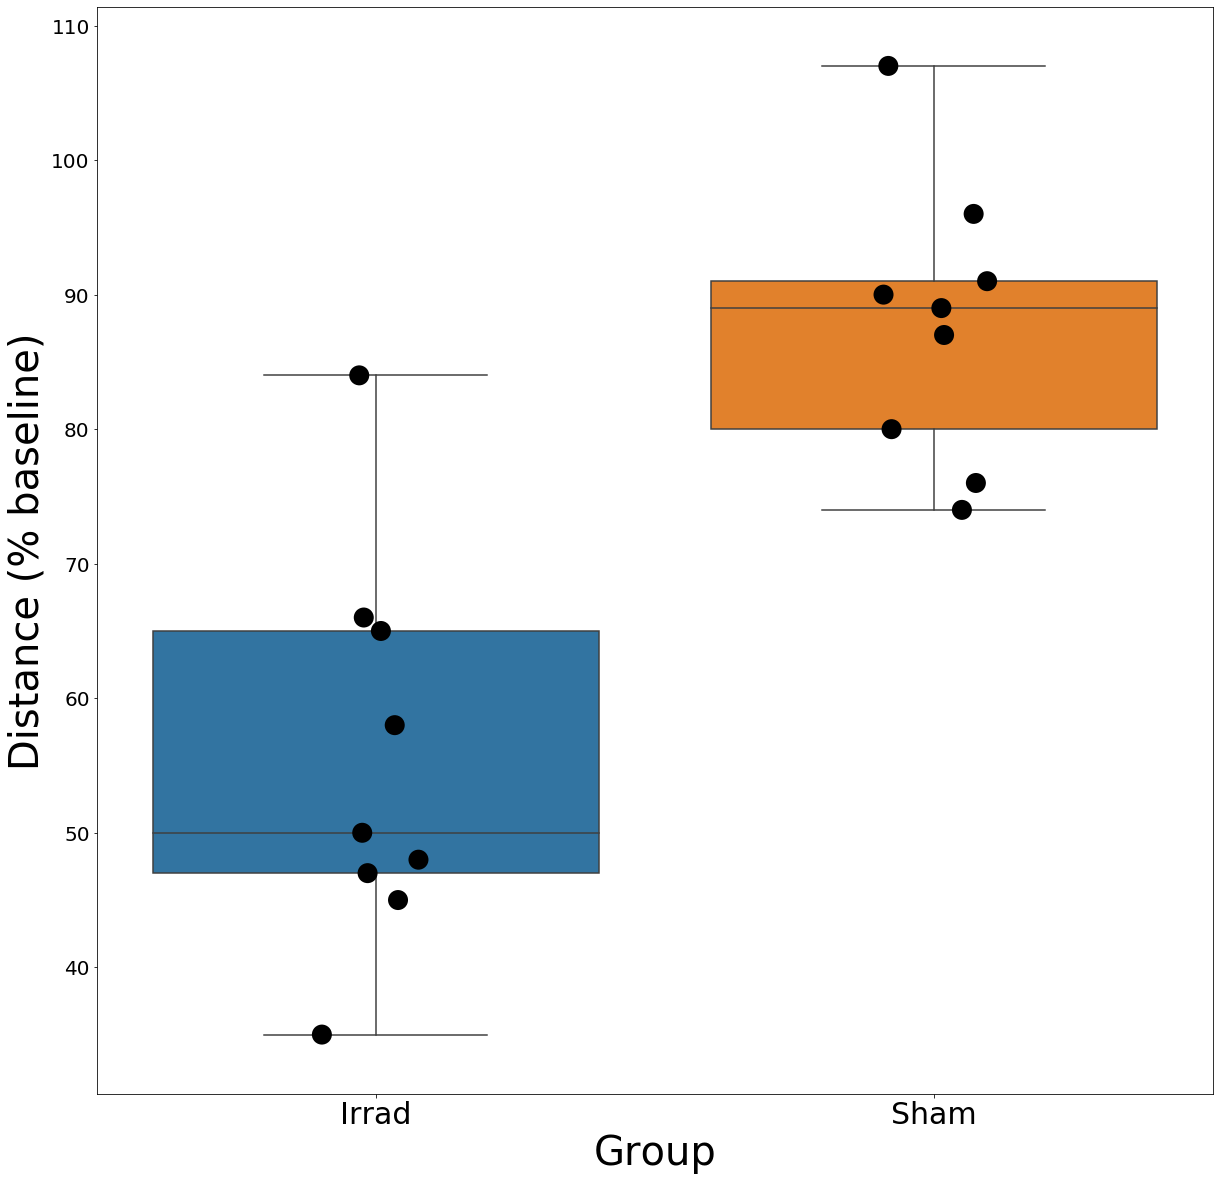

In [40]:
# FIG 3B
plt.figure(figsize=(20,20))
sns.boxplot(x='group', y='distance change (%)', data = merged_df)
sns.stripplot(x='group', y='distance change (%)', color = 'black', size = 20, data = merged_df)

plt.xlabel('Group', fontsize=40)
plt.ylabel('Distance (% baseline)', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=20)

plt.show()

In [41]:
# stat ana
F, p = f_oneway(delta_sham, delta_irrad)
print(f'F stat: {F}, p-value: {p}')

F stat: 29.703535969343307, p-value: 5.343213606351444e-05


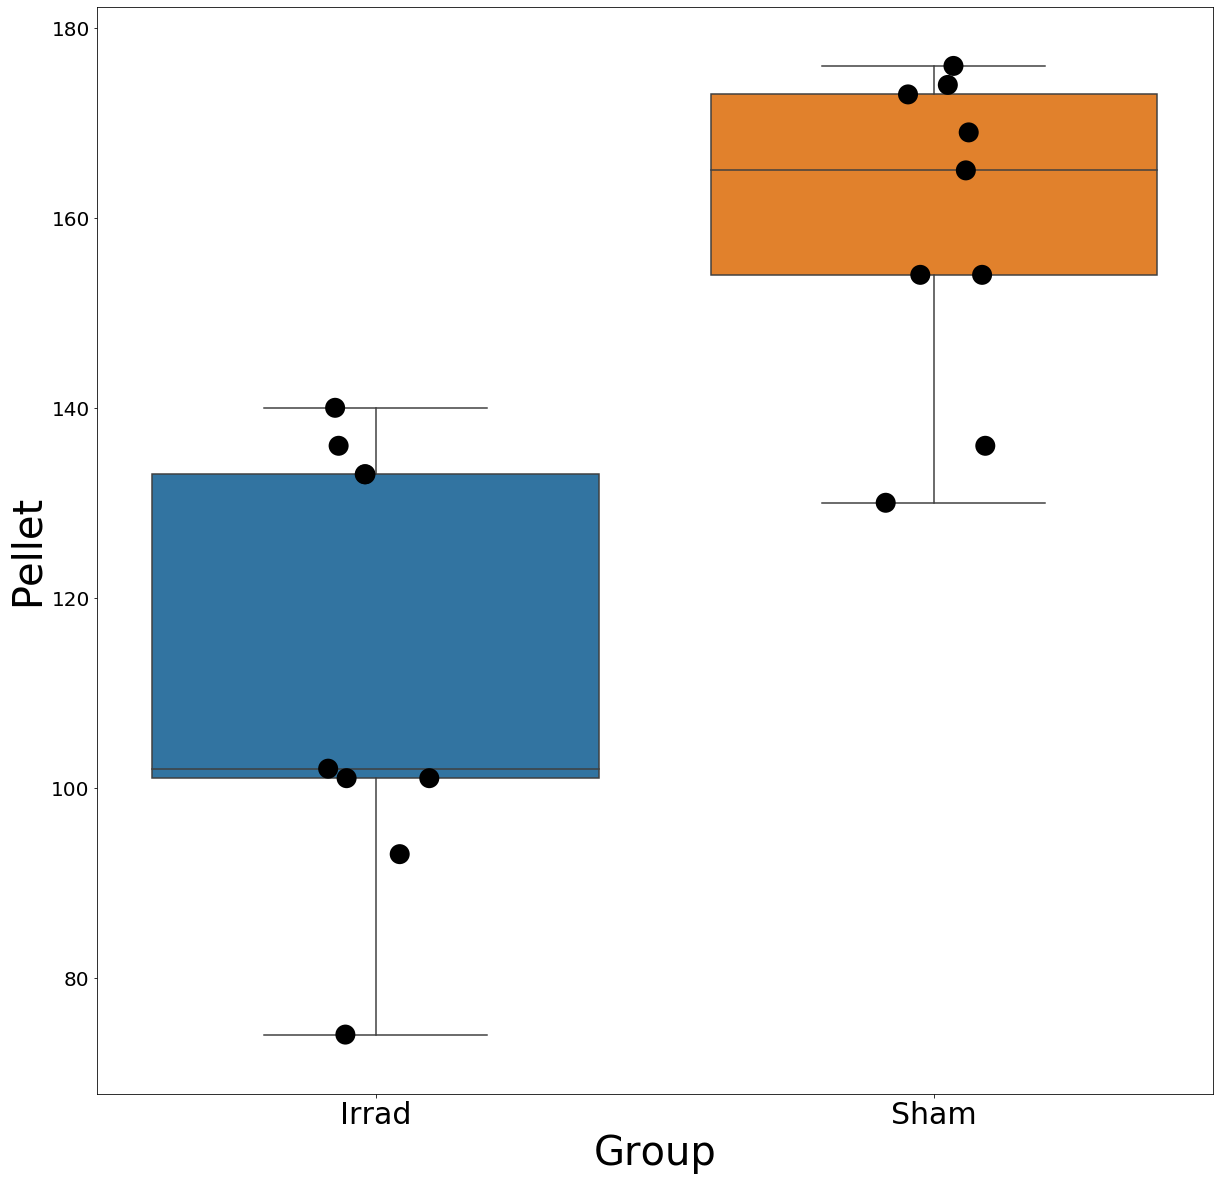

In [42]:
# FIG 3C
plt.figure(figsize=(20,20))
sns.boxplot(x='group', y='total pellet', data = merged_df)
sns.stripplot(x='group', y='total pellet', color = 'black', size = 20, data = merged_df)

plt.xlabel('Group', fontsize=40)
plt.ylabel('Pellet', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=20)

plt.show()

In [43]:
# stat ana
F, p = f_oneway(sham_new_pel, irrad_new_pel)
print(f'F stat: {F}, p-value: {p}')

F stat: 23.3471187573075, p-value: 0.0001839800736256431


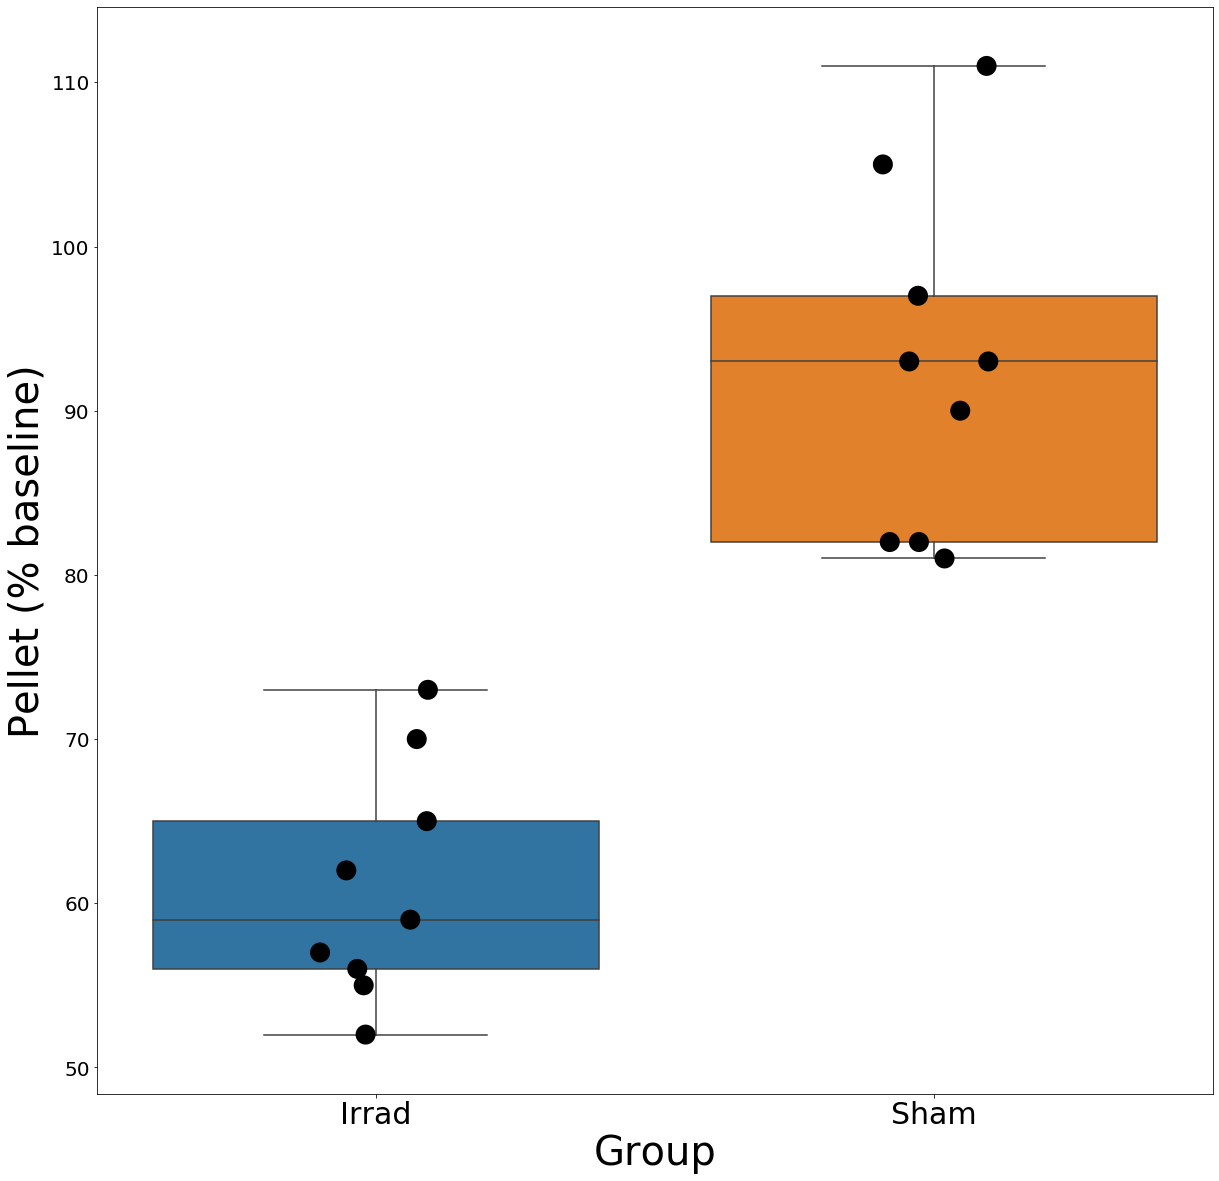

In [44]:
# Alt version of figure 3C but % change
plt.figure(figsize=(20,20))
sns.boxplot(x='group', y='pellet change (%)', data = merged_df)
sns.stripplot(x='group', y='pellet change (%)', color = 'black', size = 20, data = merged_df)

plt.xlabel('Group', fontsize=40)
plt.ylabel('Pellet (% baseline)', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=20)

plt.show()

In [45]:
# stat ana
F, p = f_oneway(delta_sham_pel, delta_irrad_pel)
print(f'F stat: {F}, p-value: {p}')

F stat: 56.3182527301092, p-value: 1.2581840219550458e-06


In [49]:
plt.figure(figsize=(20,20))
sns.lmplot(x='total distance', y='pellet', hue = "group", legend = False, data = merged_df)

plt.xlabel('Distance', fontsize=20)
plt.ylabel('Pellets', fontsize=20)
#plt.title('Correlation between reversal distance and pellets', fontsize=20);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(loc='lower right', fontsize=15)
plt.show()

KeyError: "['pellet'] not in index"

<Figure size 1440x1440 with 0 Axes>

In [47]:
# stat ana
np.corrcoef(merged_df['total distance'], merged_df['pellet'])

KeyError: 'pellet'

## Supp Figures

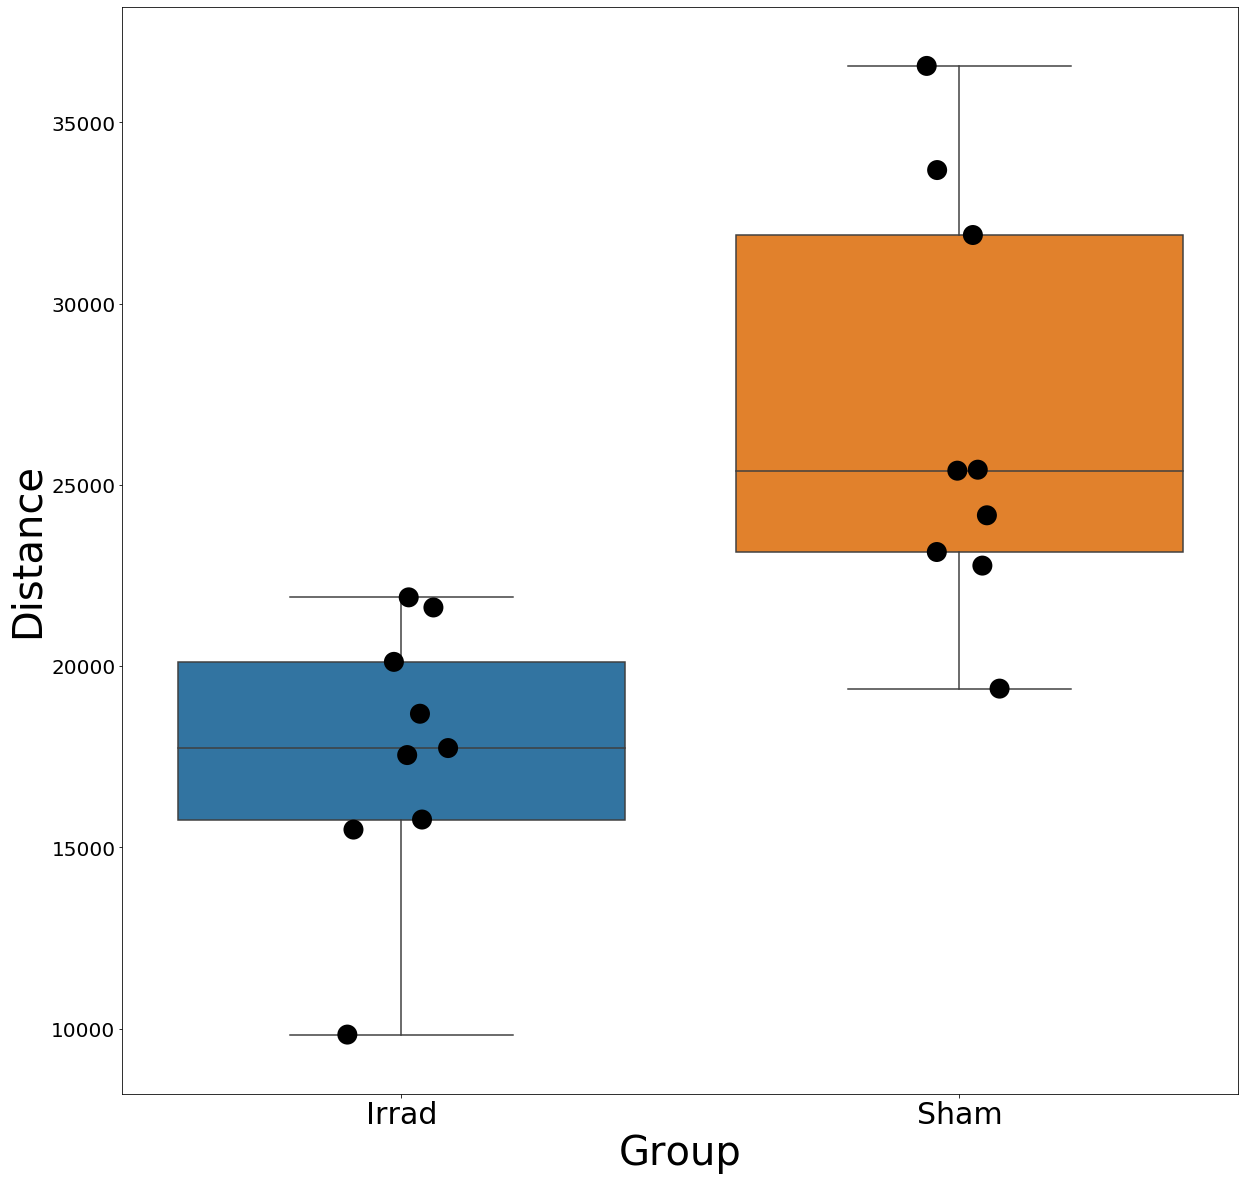

In [48]:
# Alt version of Fig 3B w/ raw dist data
plt.figure(figsize=(20,20))

sns.boxplot(x='group', y='total distance', data = merged_df)
sns.stripplot(x='group', y='total distance', color = 'black', size = 20, data = merged_df)

plt.xlabel('Group', fontsize=40)
plt.ylabel('Distance', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=20)

plt.show()